<a href="https://colab.research.google.com/github/lukitasmois/TelecomX_LATAM_2/blob/main/TelexomX_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🛠️ Preparacion de los datos**

## Importacion del archivo tratado

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('https://raw.githubusercontent.com/lukitasmois/TelecomX_LATAM_2/refs/heads/main/datos_tratados.csv')
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


## Eliminación de Columnas Irrelevantes

In [3]:
datos = datos.drop(columns='customerID')

## Transformacion de variables categoricas

In [4]:
datos[datos['Churn'].isnull()].index

Index([  30,   75,   96,   98,  175,  219,  312,  351,  368,  374,
       ...
       7058, 7061, 7062, 7143, 7155, 7158, 7180, 7211, 7239, 7247],
      dtype='int64', length=224)

In [5]:
datos = datos.drop(index=datos[ datos['Churn'].isnull()].index)

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   bool   
 4   Dependents        7043 non-null   bool   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   bool   
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   bool   
 17  

In [7]:
columnas_binarias = ['Churn','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for columna in columnas_binarias:
  datos[columna] = datos[columna].replace({'False': False, 'True':True})

datos.head()

/tmp/ipython-input-2245846821.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columna] = datos[columna].replace({'False': False, 'True':True})


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,False,Female,0,True,True,9,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,False,Male,0,False,False,9,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,True,Male,0,False,False,4,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,True,Male,1,True,False,13,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,True,Female,1,True,False,3,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   bool   
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   bool   
 4   Dependents        7043 non-null   bool   
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   bool   
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   bool   
 17  

In [9]:
datos_cod = pd.get_dummies(datos, dtype=int)
datos_cod.head(2)

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Charges.Daily,gender_Female,gender_Male,MultipleLines_False,MultipleLines_No phone service,MultipleLines_True,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_False,OnlineSecurity_No internet service,OnlineSecurity_True,OnlineBackup_False,OnlineBackup_No internet service,OnlineBackup_True,DeviceProtection_False,DeviceProtection_No internet service,DeviceProtection_True,TechSupport_False,TechSupport_No internet service,TechSupport_True,StreamingTV_False,StreamingTV_No internet service,StreamingTV_True,StreamingMovies_False,StreamingMovies_No internet service,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,0,True,True,9,True,True,65.6,593.3,2.186667,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
1,False,0,False,False,9,True,False,59.9,542.4,1.996667,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1


## Proporciones de Churn - PAUSADO

In [10]:
datos.Churn.value_counts(normalize=True)*100

,proportion
Churn,
False,73.463013
True,26.536987


## Normalizacion o estandarizacion - PAUSADO

In [11]:
datos_cod.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Charges.Daily,gender_Female,gender_Male,MultipleLines_False,MultipleLines_No phone service,MultipleLines_True,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_False,OnlineSecurity_No internet service,OnlineSecurity_True,OnlineBackup_False,OnlineBackup_No internet service,OnlineBackup_True,DeviceProtection_False,DeviceProtection_No internet service,DeviceProtection_True,TechSupport_False,TechSupport_No internet service,TechSupport_True,StreamingTV_False,StreamingTV_No internet service,StreamingTV_True,StreamingMovies_False,StreamingMovies_No internet service,StreamingMovies_True,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723,0.495244,0.504756,0.481329,0.096834,0.421837,0.343746,0.439585,0.216669,0.496663,0.216669,0.286668,0.438450,0.216669,0.344881,0.439443,0.216669,0.343888,0.493114,0.216669,0.290217,0.398978,0.216669,0.384353,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2266.794470,1.003002,0.500013,0.500013,0.499687,0.295752,0.493888,0.474991,0.496372,0.412004,0.500024,0.412004,0.452237,0.496232,0.412004,0.475363,0.496355,0.412004,0.475038,0.499988,0.412004,0.453895,0.489723,0.412004,0.486477,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,0.000000,0.608333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,1.183333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,2.345000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,3.958333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 🎯 Correlación y Selección de Variables

## Analisis de correlacion

### Coeficiente de correlación

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1:** correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.
* **0:** no hay relación lineal entre las variables.
* **1:** correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.

In [12]:
correlacion = datos_cod.corr()

In [13]:
correlacion['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
Contract_Month-to-month,0.405103
OnlineSecurity_False,0.342637
TechSupport_False,0.337281
InternetService_Fiber optic,0.308020
PaymentMethod_Electronic check,0.301919
OnlineBackup_False,0.268005
DeviceProtection_False,0.252481
Charges.Monthly,0.193356
Charges.Daily,0.193356


/tmp/ipython-input-1230613855.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacion_churn.values, y=correlacion_churn.index, palette='coolwarm')


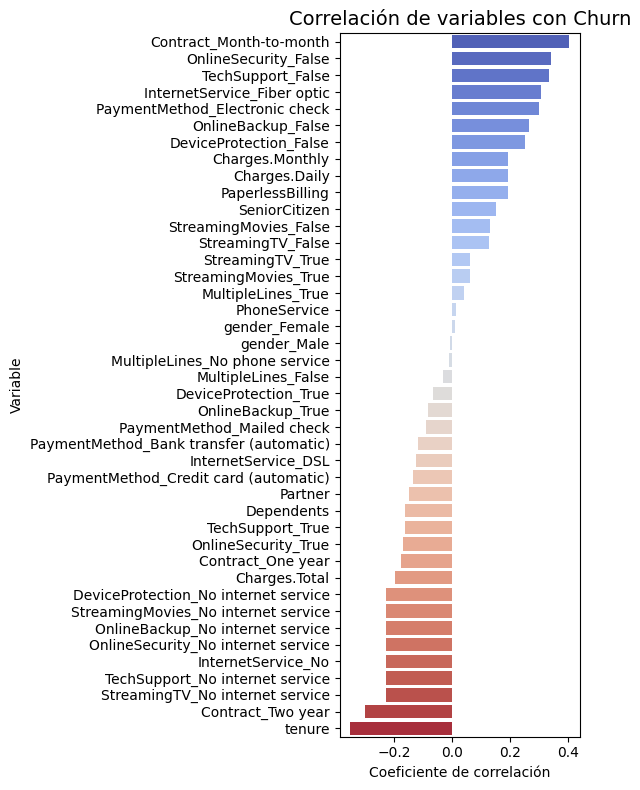

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

correlacion_churn = correlacion['Churn'].drop('Churn').sort_values(ascending=False)

plt.figure(figsize=(6, 8))
sns.barplot(x=correlacion_churn.values, y=correlacion_churn.index, palette='coolwarm')

plt.title('Correlación de variables con Churn', fontsize=14)
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

## Tiempo de contrato x Cancelacion

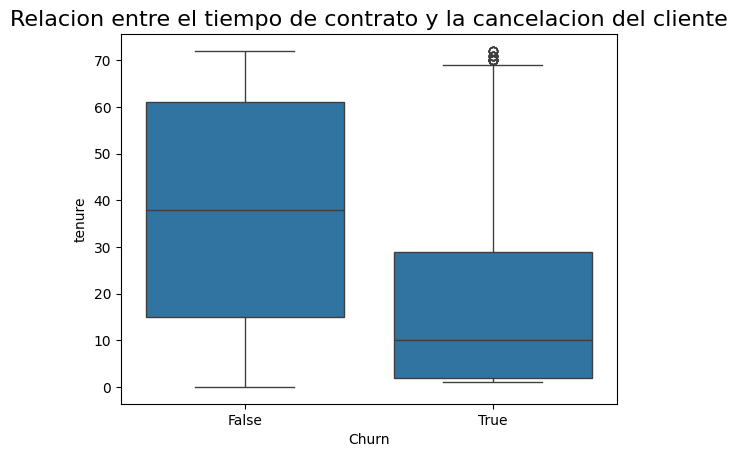

In [15]:
sns.boxplot(x='Churn', y='tenure', data=datos)
plt.title('Relacion entre el tiempo de contrato y la cancelacion del cliente', fontdict={'fontsize': 16})
plt.show()

## Gasto total × Cancelación

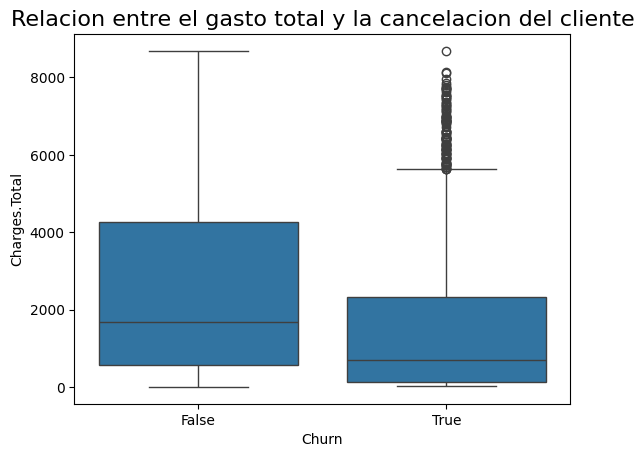

In [16]:
sns.boxplot(data=datos_cod, x='Churn', y='Charges.Total')
plt.title('Relacion entre el gasto total y la cancelacion del cliente', fontdict={'fontsize': 16})
plt.show()

🤖 Modelado Predictivo

## Separacion de datos de entrenamiento y testeo

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = datos_cod.drop(columns='Churn')
y = datos_cod.Churn

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Normalizacion de datos

Como podemos observar en el grafico a continuacion, los valores de los datos estan en escalas muy diferentes, resaltando los valores de variables como 'Charges.Total' con respecto a los demas. Esto podria cusar un sezgo en nuestro modelo, debido a que podria darle mas relevancia a estas variables que a las demas.
En estos casos debemos normalizar los valores, para que todas los paramentros tengan el mismo "peso" para el modelo.

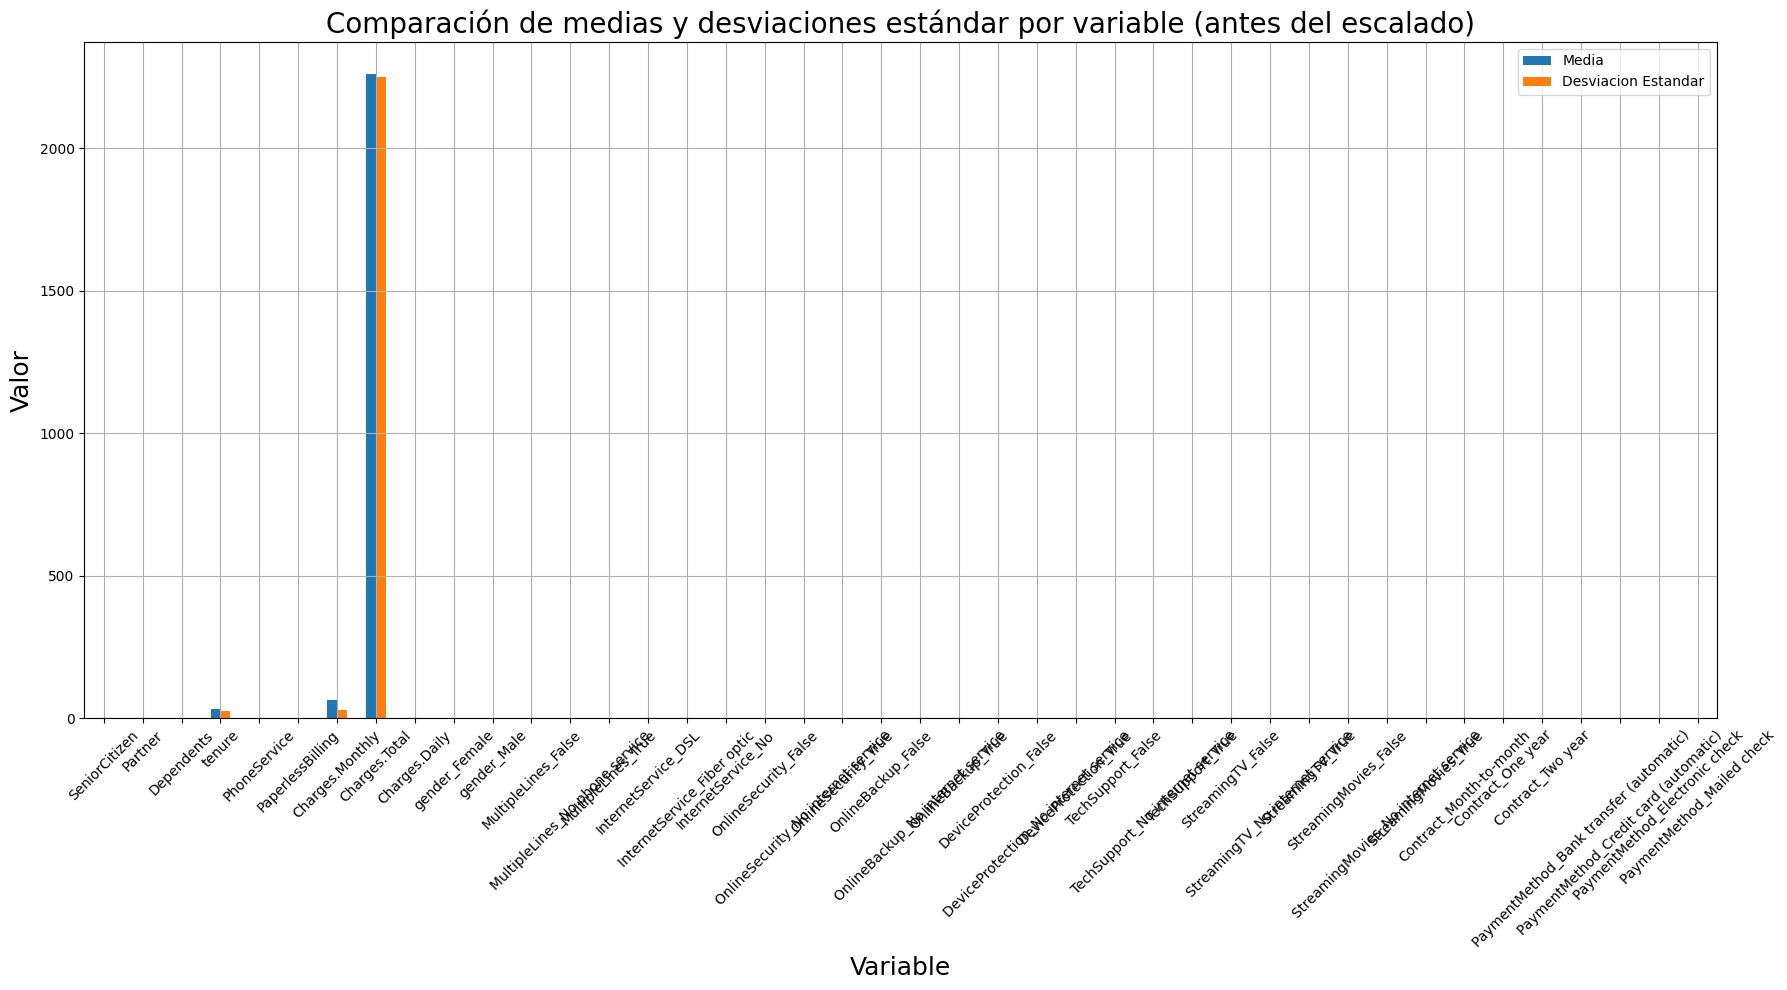

In [20]:
df_stats = pd.DataFrame({
    'Media': X_train.mean(),
    'Desviacion Estandar': X_train.std()
})

df_stats.plot(kind='bar', figsize=(18, 10))
plt.title('Comparación de medias y desviaciones estándar por variable (antes del escalado)', fontsize=20)
plt.ylabel('Valor', fontdict={'fontsize':18})
plt.xlabel('Variable', fontdict={'fontsize':18})
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)

## Balanceo de clases

A partir del siguiente grafico podemos observar que las frecuencias de la variable respuesta (si el cliente cancelo o no) estan muy desbalanceadas la una de la otra. Esto podria generar interferencias a la hora de entrenar modelos especificos.

In [22]:
df_churns = datos['Churn'].value_counts(normalize=True)*100
df_churns = df_churns.reset_index()
df_churns['Churn'] = df_churns['Churn'].replace({True: 'Cancelado', False: 'No cancelado'})
df_churns

,Churn,proportion
0,No cancelado,73.463013
1,Cancelado,26.536987


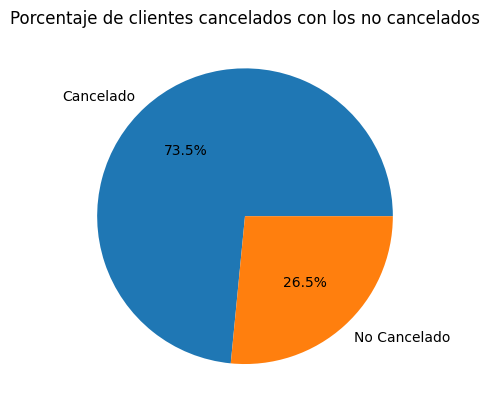

In [23]:
plt.pie(df_churns['proportion'], labels=['Cancelado', 'No Cancelado'], autopct='%1.1f%%')
plt.title('Porcentaje de clientes cancelados con los no cancelados')

plt.show();

Como se puede observar hay un gran desvalance entre ambos valores de las variables, por lo tanto lo mas indicado seria balancear los datos aplicando "oversampling"

## **Oversampling**

El oversampling es una estrategia que consiste en generar de manera artificial nuevos registros de la variable minoritaria. De esta manera el modelo prestara la misma atencion a ambos valores y en un principio podra diferencias mejor las dos clases.

Los nuevos registros se podrian generar de manera aleatoria o como en este caso, utilzar una tecnica llamada SMOTE para generar datos sinteticos con un patron cercano al existente.

In [24]:
from imblearn.combine import SMOTEENN

over_sampling = SMOTEENN()

X_balanceada, y_balanceada = over_sampling.fit_resample(X_train_norm, y_train)

In [25]:
y_balanceada.value_counts(normalize=True)

,proportion
Churn,
True,0.551464
False,0.448536


## Creacion de modelos

### KNN

El algoritmo KNN se basa en el cálculo de la distancia entre los registros de la base de datos y busca elementos que estén cerca unos de otros (vecinos) para tomar la decisión de clasificación.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

### Random Forest

Random Forest esta basado en los arboles de decisiones, este algoritmo crea varios subconjuntos de arboles de decicion y combina sus resultados para obtener predicciones mas robustas y precisas

En este caso como la variable respuesta que necesitamos predecir es una variable binaria (positivo o falso) utilizaremos un RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=10, random_state=101)

## Entrenamiento de modelos

### KNN

In [32]:
knn.fit(X_balanceada, y_balanceada)

KNeighborsClassifier()

### Random Forest

In [33]:
random_forest.fit(X_balanceada, y_balanceada)

RandomForestClassifier(max_depth=10, random_state=101)